<a href="https://colab.research.google.com/github/JhowSantiago/Traducao_entre_idiomas_com_Transformer/blob/main/Tradu%C3%A7%C3%A3o_entre_idiomas_com_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Importação das bibliotecas

In [1]:
# Importando a biblioteca NumPy com o alias 'np'
import numpy as np  # Manipulação de arrays e operações matemáticas

# Importando a biblioteca padrão 'math'
import math  # Funções matemáticas comuns

# Importando o módulo 're' da biblioteca padrão
import re  # Manipulação de expressões regulares

# Importando a biblioteca 'time' da biblioteca padrão
import time  # Medição de tempo e criação de atrasos

# Importando a biblioteca 'zipfile' da biblioteca padrão
import zipfile  # Trabalhar com arquivos ZIP

# Importando o módulo 'random' da biblioteca padrão
import random  # Geração de números aleatórios

# Importando o módulo 'drive' da biblioteca 'google.colab'
from google.colab import drive  # Integração com o Google Drive

# Importando o módulo 'tensorflow' com a versão 2.x
%tensorflow_version 2.x
import tensorflow as tf  # Biblioteca para deep learning

# Importando o submódulo 'layers' do TensorFlow Keras
from tensorflow.keras import layers  # Componentes para construir redes neurais

# Importando a biblioteca 'tensorflow_datasets' com o alias 'tfds'
import tensorflow_datasets as tfds  # Conjuntos de dados prontos para uso com TensorFlow


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Etapa 2: Pré-processamento dos dados

## Carregamento da base de dados

- Bases de dados: https://www.statmt.org/europarl/
- parallel corpus Portuguese-English, 189 MB, 04/1996-11/2011

In [2]:
#conectando com o google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Definindo o caminho do arquivo ZIP
path = '/content/drive/MyDrive/pt-en.zip'

# Criando um objeto ZipFile para trabalhar com o arquivo ZIP no modo leitura ('r')
zip_object = zipfile.ZipFile(file=path, mode='r')

# Extraindo todo o conteúdo do arquivo ZIP para o diretório atual ('./')
zip_object.extractall('./')

# Fechando o objeto ZipFile para liberar recursos
zip_object.close()


In [4]:
# Abrindo o arquivo 'europarl-v7.pt-en.en' no modo leitura ('r') com codificação UTF-8
with open('/content/pt-en/europarl-v7.pt-en.en', mode='r', encoding='utf-8') as f:
    europarl_en = f.read()  # Lendo o conteúdo do arquivo e armazenando na variável 'europarl_en'

# Abrindo o arquivo 'europarl-v7.pt-en.pt' no modo leitura ('r') com codificação UTF-8
with open('/content/pt-en/europarl-v7.pt-en.pt', mode='r', encoding='utf-8') as f:
    europarl_pt = f.read()  # Lendo o conteúdo do arquivo e armazenando na variável 'europarl_pt'


In [5]:
#visualizando algum texto da base de dados en
europarl_en[0:100]

'Resumption of the session\nI declare resumed the session of the European Parliament adjourned on Frid'

In [6]:
# Dividindo o conteúdo do arquivo 'europarl_en' em linhas usando o caractere de quebra de linha '\n'
en = europarl_en.split('\n')

In [7]:
# Calculando o tamanho (número de elementos) da lista 'en'
tamanho_en = len(en)

In [8]:
#CASO QUERIA VISUALIZAR TODO O TEXTO

#en

In [9]:
# Dividindo o conteúdo do arquivo 'europarl_pt' em linhas usando o caractere de quebra de linha '\n'
pt = europarl_pt.split('\n')

In [10]:
# Calculando o tamanho (número de elementos) da lista 'pt'
len(pt)

1960408

In [11]:
# Loop que será executado 5 vezes
for _ in range(5):
    print('------------------------')  # Imprime uma linha de traços como separador visual

    # Gerando um número inteiro aleatório entre 0 e o tamanho da lista 'en' - 1
    i = random.randint(0, len(en) - 1)

    # Imprime a linha aleatória correspondente da lista 'en'
    print(en[i])

    # Imprime a linha aleatória correspondente da lista 'pt'
    print(pt[i])


------------------------
I would therefore like to ask the Commission today to put forward suitable proposals on this agenda item before the debate in the next plenary session and to explain the measures which it – the Commission – is proposing or is able to propose for taking action against Belarus and its present government and for strengthening the opposition there.
Queria, por conseguinte, pedir hoje à Comissão que avançasse com propostas adequadas relativas a este ponto da ordem do dia antes do debate no próximo período de sessões e expusesse as medidas que propõe, ou pode propor, para agir contra a Bielorrússia e o seu actual governo e para reforçar a oposição naquele país.
------------------------
I have seen six new Member States join the Community and I have seen a systematic and welcome increase in Parliament's powers.
Vivi a adesão de seis novos Estados-Membros, e felizmente, também assisti ao aumento sistemático das competências.
------------------------
Like the previous s

## Limpeza dos dados

In [12]:
# Copiando o conteúdo da variável 'europarl_en' para 'corpus_en'
corpus_en = europarl_en

# Substituindo pontos seguidos de números, letras minúsculas ou letras maiúsculas por '.$$$'
corpus_en = re.sub(r"\.(?=[0-9]|[a-z]|[A-Z])", ".$$$", corpus_en)

# Removendo as ocorrências de '.$$$' (pontos inseridos anteriormente)
corpus_en = re.sub(r".\$\$\$", '', corpus_en)

# Substituindo múltiplos espaços consecutivos por um único espaço
corpus_en = re.sub(r" +", " ", corpus_en)

# Dividindo o conteúdo de 'corpus_en' em linhas usando o caractere de quebra de linha '\n'
corpus_en = corpus_en.split('\n')

In [13]:
# Copiando o conteúdo da variável 'europarl_pt' para 'corpus_pt'
corpus_pt = europarl_pt

# Substituindo pontos seguidos de números, letras minúsculas ou letras maiúsculas por '.$$$'
corpus_pt = re.sub(r"\.(?=[0-9]|[a-z]|[A-Z])", ".$$$", corpus_pt)

# Removendo as ocorrências de '.$$$' (pontos inseridos anteriormente)
corpus_pt = re.sub(r".\$\$\$", '', corpus_pt)

# Substituindo múltiplos espaços consecutivos por um único espaço
corpus_pt = re.sub(r" +", " ", corpus_pt)

# Dividindo o conteúdo de 'corpus_pt' em linhas usando o caractere de quebra de linha '\n'
corpus_pt = corpus_pt.split('\n')


In [14]:
#verificando se possuem o mesmo tamanho
len(corpus_en)

1960408

In [15]:
#verificando se possuem o mesmo tamanho
len(corpus_pt)

1960408


## Tokenização

In [16]:
2**13

8192

In [17]:
# Criando um tokenizador para o texto em inglês com base no corpus 'corpus_en'
# O tokenizador será do tipo SubwordTextEncoder, que divide o texto em subpalavras
# target_vocab_size especifica o tamanho máximo do vocabulário gerado pelo tokenizador
tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(corpus_en, target_vocab_size=2**13)

In [18]:
#tamanho do vocabulario EN
tokenizer_en.vocab_size

8191

In [19]:
# Criando um tokenizador para o texto em portugues com base no corpus 'corpus_pt'
# O tokenizador será do tipo SubwordTextEncoder, que divide o texto em subpalavras
# target_vocab_size especifica o tamanho máximo do vocabulário gerado pelo tokenizador
tokenizer_pt = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(corpus_pt, target_vocab_size=2**13)

In [20]:
#tamanho do vocabulario em PT
tokenizer_pt.vocab_size

8116

In [21]:
vocab_size_en = tokenizer_en.vocab_size + 2
vocab_size_pt = tokenizer_pt.vocab_size + 2

In [22]:
#criando efetivamente as entradas que vai ser passada para a rede neural (atributos previsores)
#inputs = lista que vai conter os dados em EN
#vocab_size_en - 2 = token de inicio de frase(8191)
#+ tokenizer_en.encode(sentence) =  passamos um texto e ele vai retornar numero
#+ vocab_size_en - 1 = token de final de frase(8192)
# for sentence in corpus_en  = Iterando por cada frase no corpus em inglês
inputs = [[vocab_size_en - 2] + tokenizer_en.encode(sentence) + [vocab_size_en - 1] for sentence in corpus_en]

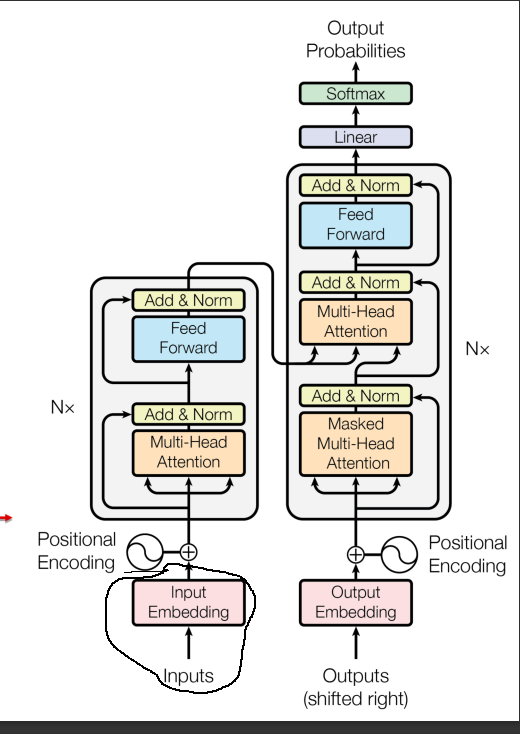

In [23]:
# Loop que será executado 5 vezes
# Obtendo um índice aleatório dentro do intervalo válido para a lista 'inputs'
for _ in range(5):
  print(inputs[random.randint(0, len(inputs) -  1)])


[8191, 38, 18, 54, 1275, 811, 36, 52, 81, 143, 2, 6, 1204, 2, 15, 18, 54, 758, 591, 1, 4753, 7981, 8192]
[8191, 1066, 322, 2, 82, 1, 3518, 9, 7984, 282, 60, 26, 18, 41, 1094, 109, 8, 7984, 282, 51, 4175, 93, 7981, 8192]
[8191, 562, 280, 21, 105, 36, 1, 4095, 8013, 13, 616, 9, 587, 2, 1, 527, 8, 33, 18, 4, 14, 2986, 2, 21, 11, 1526, 104, 6, 30, 2584, 2346, 2, 9, 10, 1, 2181, 622, 4, 97, 30, 6943, 7981, 8192]
[8191, 38, 3988, 46, 5, 11, 137, 15, 40, 300, 12, 212, 46, 8, 1, 2626, 3, 5979, 36, 1386, 4, 3104, 509, 35, 14, 208, 21, 7, 807, 676, 3, 1, 23, 113, 90, 13, 509, 240, 7981, 8192]
[8191, 11, 365, 19, 419, 30, 2346, 7981, 8192]


In [24]:
#outputs = lista que vai conter os dados em pt (aqueles dados que queremos fazer a previsão)
#vocab_size_en - 2 = token de inicio de frase(8191)
#+ tokenizer_en.encode(sentence) =  passamos um texto e ele vai retornar numero
#+ vocab_size_en - 1 = token de final de frase(8192)
# for sentence in corpus_en  = Iterando por cada frase no corpus em pt
outputs = [[vocab_size_pt - 2] + tokenizer_pt.encode(sentence) + [vocab_size_pt - 1] for sentence in corpus_pt]

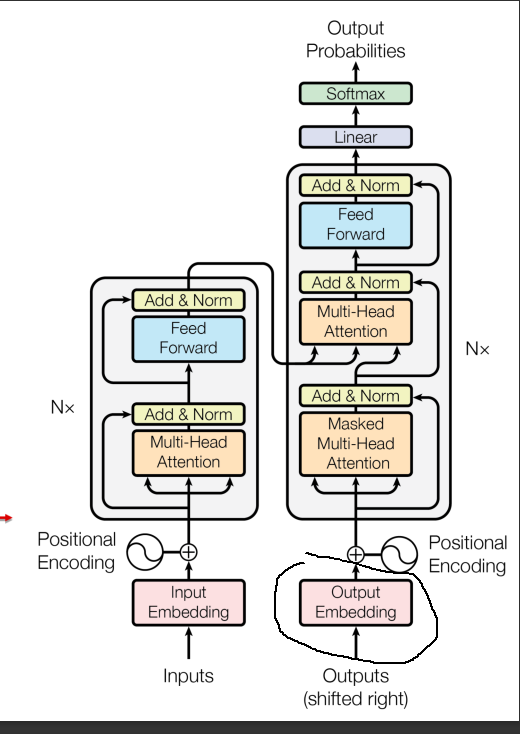

In [25]:
# Loop que será executado 5 vezes
# Obtendo um índice aleatório dentro do intervalo válido para a lista 'outputs'
for _ in range(5):
  print(outputs[random.randint(0, len(outputs) - 1)])

[8116, 5876, 1, 6, 64, 15, 5579, 3925, 3, 677, 3176, 7, 26, 117, 8, 248, 4095, 5, 2978, 7906, 8117]
[8116, 3288, 7892, 61, 622, 726, 997, 84, 139, 3865, 45, 230, 882, 5, 24, 40, 95, 7906, 8117]
[8116, 291, 873, 1, 7529, 5808, 7892, 974, 22, 6366, 3, 805, 8, 72, 88, 6434, 2307, 1861, 1, 136, 3276, 4, 1392, 55, 652, 259, 45, 4821, 1503, 7892, 4, 2950, 104, 9, 3879, 1, 532, 1, 1308, 1, 1927, 3994, 7974, 7905, 70, 8, 7077, 4895, 7892, 4, 7300, 3, 8, 293, 297, 2, 4760, 7906, 8117]
[8116, 1189, 1, 12, 472, 6655, 122, 1, 12, 472, 58, 3, 40, 67, 5, 9, 230, 1309, 7906, 8117]
[8116, 1150, 1, 275, 2, 277, 1298, 145, 13, 1422, 2, 951, 1651, 1174, 6520, 7906, 8117]


## Remoção de sentenças muito longas

In [26]:
# Definindo o comprimento máximo permitido para as sequências de tokens
max_length = 15

# Criando uma lista de índices para remover com base no comprimento das sequências de tokens
# A lista 'idx_to_remove' conterá os índices das frases cujas sequências de tokens têm comprimento maior que 'max_length'
#count for count, sentence = percorrendo uma sentence e medindo o tamanho da sentence se for maior que length vai armazenar os indices selecionados em count
idx_to_remove = [count for count, sentence in enumerate(inputs) if len(sentence) > max_length]

In [27]:
#quantidade de indices selecionados
len(idx_to_remove)

1685300

In [28]:
#Apagando grande parte dos dados pois a base de dados eh muito grande mas o idela seria permanecer com ela completa
#usando o reversed para nao bagunçar os indices apos apagar cada sentence
# Iterando reversamente pelos índices a serem removidos
for idx in reversed(idx_to_remove):
    # Removendo a sequência de tokens do input com o índice 'idx'
    del inputs[idx]

    # Removendo a sequência de tokens do output com o índice 'idx'
    del outputs[idx]


In [29]:
# Criando uma lista de índices para remover com base no comprimento das sequências de tokens
# A lista 'idx_to_remove' conterá os índices das frases cujas sequências de tokens têm comprimento maior que 'max_length'
#count for count, sentence = percorrendo uma sentence e medindo o tamanho da sentence if sentence maior que length vai armazenar os indices selecionados em count
idx_to_remove = [count for count, sentence in enumerate(outputs) if len(sentence) > max_length]

In [30]:
len(idx_to_remove)

66118

In [31]:
#Apagando grande parte dos dados pois a base de dados eh muito grande mas o idela seria permanecer com ela completa
#usando o reversed para nao bagunçar os indices apos apagar cada sentence
# Iterando reversamente pelos índices a serem removidos
for idx in reversed(idx_to_remove):
    # Removendo a sequência de tokens do input com o índice 'idx'
    del inputs[idx]

    # Removendo a sequência de tokens do output com o índice 'idx'
    del outputs[idx]


In [32]:
#precisam ter o mesmo tamanho
len(inputs)

208990

In [33]:
#precisam ter o mesmo tamanho
len(outputs)

208990

## Padding e batches

In [34]:
# Padronizando o comprimento das sequências de tokens no input
# A função pad_sequences é usada para preencher ou truncar as sequências para que tenham o mesmo comprimento
# As sequências são preenchidas com o valor 0 e o preenchimento é realizado após a sequência (padding='post')
# O comprimento máximo permitido é definido por 'max_length'
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs, value=0, padding = 'post', maxlen=max_length)

# Padronizando o comprimento das sequências de tokens no output
# A função pad_sequences é usada para preencher ou truncar as sequências para que tenham o mesmo comprimento
# As sequências são preenchidas com o valor 0 e o preenchimento é realizado após a sequência (padding='post')
# O comprimento máximo permitido é definido por 'max_length'
outputs = tf.keras.preprocessing.sequence.pad_sequences(outputs, value=0, padding = 'post', maxlen=max_length)

In [35]:
# Loop que será executado 5 vezes
for _ in range(5):
    # Obtendo um índice aleatório dentro do intervalo válido para a lista 'outputs'
    random_index = random.randint(0, len(outputs) - 1)

    # Imprimindo a sequência de tokens correspondente ao índice aleatório selecionado
    print(outputs[random_index])


[8116   36  122 2467 3109 7892   20 1929    2  343 8117    0    0    0
    0]
[8116  373   57 1803   14  196   47 6011 7906 8117    0    0    0    0
    0]
[8116  444  670 4163  110 7923 8117    0    0    0    0    0    0    0
    0]
[8116 7900   36   50 5930    3 2867 7901 8117    0    0    0    0    0
    0]
[8116  556 7905   16    2   13 4269 7906 8117    0    0    0    0    0
    0]


from_tensor_slices: https://www.geeksforgeeks.org/tensorflow-tf-data-dataset-from_tensor_slices/

cache e prefetch: https://www.tensorflow.org/guide/data_performance

In [36]:
# Definindo o tamanho do lote (batch_size)  vai ser utilizado de 64 em 64 registror por vez
batch_size = 64
#dividir a base de dados em pedaço de 20000 em 20000 registros
buffer_size = 20000

# Criando um conjunto de dados (dataset) a partir das listas 'inputs' e 'outputs'
# A função from_tensor_slices é usada para criar um conjunto de dados a partir de tensores (listas neste caso)
# Deixando no formato mais especifico do tensorflow
dataset = tf.data.Dataset.from_tensor_slices((inputs, outputs))

# Armazenando o conjunto de dados em cache para otimização
# Isso melhora o desempenho ao acessar os dados durante o treinamento
dataset = dataset.cache()

# Embaralhando o conjunto de dados usando o buffer_size especificado
# Isso é útil para embaralhar os dados aleatoriamente antes de cada época de treinamento
# Shuflle serve para misturar os dados
dataset = dataset.shuffle(buffer_size).batch(batch_size)

# Pré-carregando os dados em buffer para melhorar o desempenho durante o treinamento
# A constante tf.data.experimental.AUTOTUNE é usada para determinar automaticamente o número ideal de elementos a serem pré-carregados
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

# Etapa 3: Construção do modelo

## Embedding

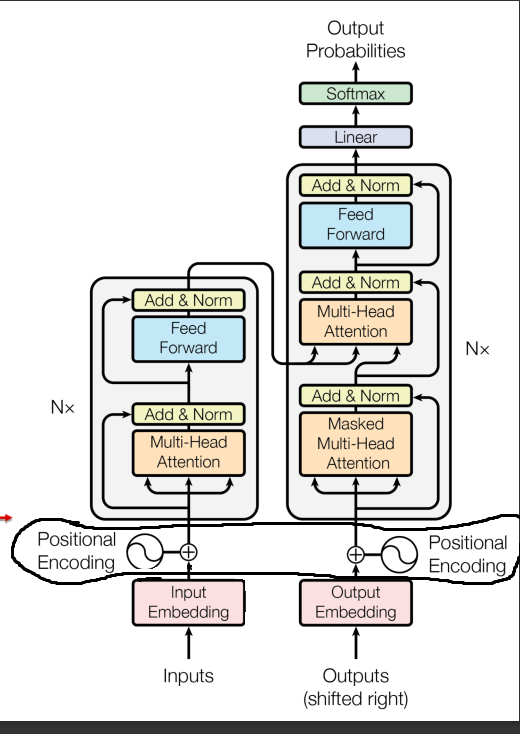

Positional encoding:

$PE_{(pos,2i)} =\sin(pos/10000^{2i/dmodel})$

$PE_{(pos,2i+1)} =\cos(pos/10000^{2i/dmodel})$

- The positional encodings have the same dimension dmodel
as the embeddings, so that the two can be summed

- As codificações posicionais têm a mesma dimensão dmodel
que os embeddings, para que os dois possam ser somados

- No final vamos retonar um somatorio dos Embeddings com os positional Enconding

In [37]:
class PositionalEncoding(layers.Layer):
    def __init__(self):
        # Construtor da classe, inicializa a classe herdada 'layers.Layer'
        super(PositionalEncoding, self).__init__()

    #buscar os angulos
    def get_angles(self, pos, i, d_model):
        # Calcula os ângulos para a codificação posicional usando uma fórmula específica
        angles = 1 / np.power(10000., (2 * (i // 2)) / np.float32(d_model))
        return pos * angles  # Retorna os ângulos calculados (shape: (seq_lenght, d_model))

    #Função que executa toda vez que uma camada é chamada
    def call(self, inputs):
        # Método que aplica a codificação posicional às entradas do modelo
        # Obtém o tamanho da sequência (quantidade de tokens) e o tamanho do modelo (número de dimensões)
        #.shape (tipo do tensorflow)
        #linhas que temos no Embedding
        seq_length = inputs.shape.as_list()[-2]
        #Colunas que temos no Embedding
        d_model = inputs.shape.as_list()[-1]

        # Calcula os ângulos para a codificação posicional usando o método 'get_angles'
        # 'np.arange(seq_length)[:, np.newaxis]' cria uma matriz de posições (0 até seq_length-1)
        # 'np.arange(d_model)[np.newaxis, :]' cria uma matriz de índices de modelo (0 até d_model-1)
        angles = self.get_angles(np.arange(seq_length)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)

        # Atribui os valores dos senos (sin) aos ângulos nas posições pares do d_model
        angles[:, 0::2] = np.sin(angles[:, 0::2])

        # Atribui os valores dos cossenos (cos) aos ângulos nas posições ímpares do d_model
        angles[:, 1::2] = np.cos(angles[:, 1::2])

        # Cria a codificação posicional adicionando uma dimensão extra no início (para compatibilidade com as entradas do modelo)
        pos_encoding = angles[np.newaxis, ...]

        # Realiza o cast para o tipo tf.float32 para garantir a compatibilidade com TensorFlow
        # Retorna as entradas originais somadas à codificação posicional
        return inputs + tf.cast(pos_encoding, tf.float32)


## Mecanismo de atenção

### Cálculo da atenção

- Calculo da atenção da frase com ela mesma

$Attention(Q, K, V ) = \text{softmax}\left(\dfrac{QK^T}{\sqrt{d_k}}\right)V $

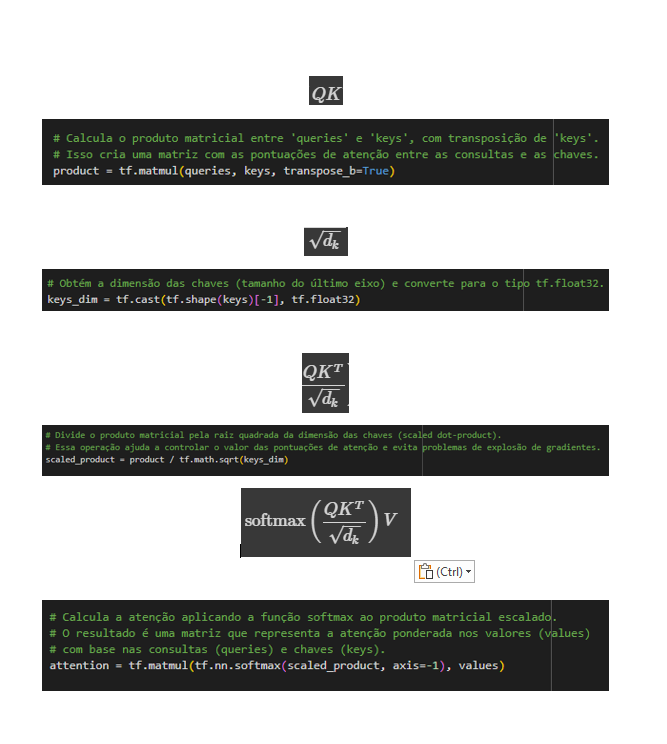

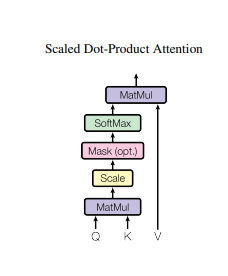

In [38]:
#Calculo da atenção da frase com ela mesma
def scaled_dot_product_attention(queries, keys, values, mask):
    """
    Implementação da atenção scaled dot-product.

    Arguments:
        queries: Tensor de shape (batch_size, seq_length_q, depth_q).
                 Representa as consultas (queries) para a atenção.
        keys: Tensor de shape (batch_size, seq_length_k, depth_k).
              Representa as chaves (keys) para a atenção.
        values: Tensor de shape (batch_size, seq_length_v, depth_v).
                Representa os valores (values) para a atenção.
        mask: Tensor de shape (batch_size, seq_length_q, seq_length_k) ou None.
              Máscara de atenção para lidar com elementos de "padding" na sequência.

    Returns:
        Tensor de shape (batch_size, seq_length_q, depth_v).
        Representa o resultado da atenção ponderada nos valores (values) com base nas consultas (queries) e chaves (keys).
    """

    # Calcula o produto matricial entre 'queries' e 'keys', com transposição de 'keys'.
    # Isso cria uma matriz com as pontuações de atenção entre as consultas e as chaves.
    product = tf.matmul(queries, keys, transpose_b=True)

    # Obtém a dimensão das chaves (tamanho do último eixo) e converte para o tipo tf.float32.
    keys_dim = tf.cast(tf.shape(keys)[-1], tf.float32)

    # Divide o produto matricial pela raiz quadrada da dimensão das chaves (scaled dot-product).
    # Essa operação ajuda a controlar o valor das pontuações de atenção e evita problemas de explosão de gradientes.
    scaled_product = product / tf.math.sqrt(keys_dim)

    # Verifica se uma máscara de atenção foi fornecida como entrada.
    # A máscara é usada para lidar com elementos de "padding" na sequência,
    # onde a atenção para esses elementos deve ser definida como zero.
    if mask is not None:
        # Subtrai uma grande constante negativa (1e9) dos elementos da matriz 'scaled_product'
        # onde a máscara é igual a 1 (indicando elementos de "padding").
        # Essa operação força a atenção desses elementos a ser muito próxima de zero.
        scaled_product += (mask * -1e9)#0.0000000000000001

    # Calcula a atenção aplicando a função softmax ao produto matricial escalado.
    # O resultado é uma matriz que representa a atenção ponderada nos valores (values)
    # com base nas consultas (queries) e chaves (keys).
    attention = tf.matmul(tf.nn.softmax(scaled_product, axis=-1), values)

    # Retorna o resultado da atenção ponderada (attention).
    # Essa matriz de atenção será usada em etapas subsequentes do modelo baseado em transformadores,
    # como na camada de multi-head attention.
    return attention


### Multi-head attention sublayer

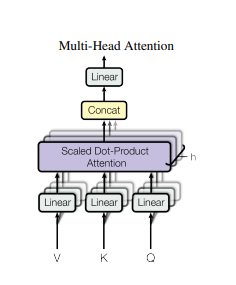

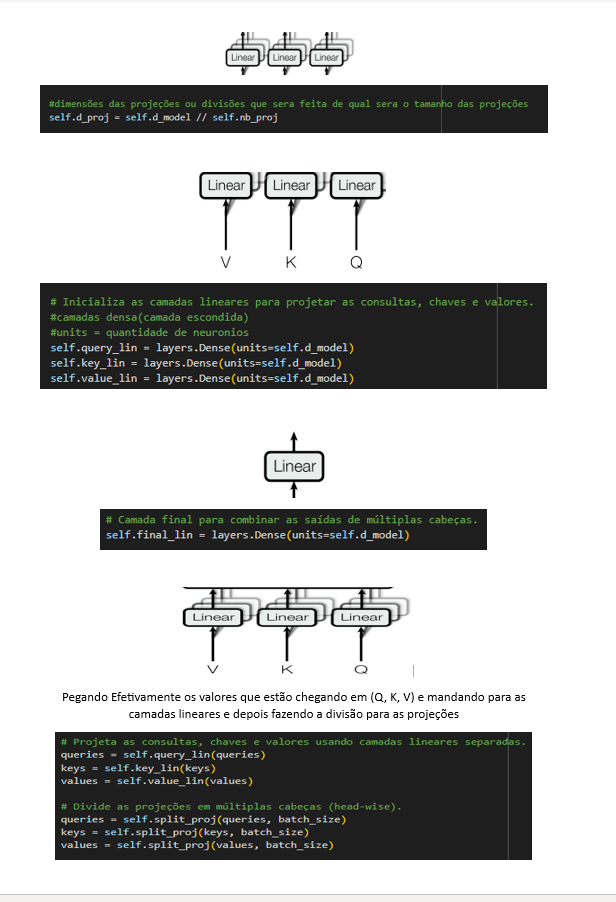

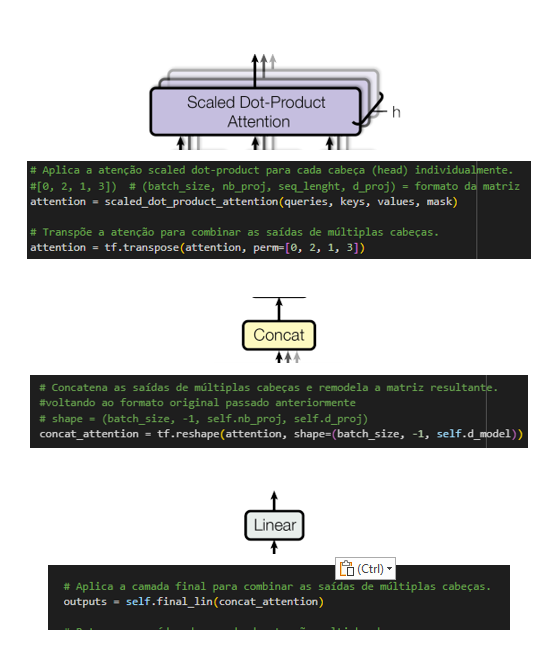

In [39]:
class MultiHeadAttention(layers.Layer):
    #__init__ eh executado quando cria o objeto
    def __init__(self, nb_proj):
        """
        Implementação da camada de atenção multi-head.

        Arguments:
            nb_proj: Número de cabeças de atenção (número de projeções).

        Returns:
            None
        """
        #herdando tudo que tem na camada layers do tensorFlow
        super(MultiHeadAttention, self).__init__()
        #nb_proj = quantidade de vezes que sera feita a divisão
        self.nb_proj = nb_proj

    #Build é executado quando o objeto eh executado pela primeira vez
    def build(self, input_shape):
        """
        Constrói a camada de atenção multi-head.

        Arguments:
            input_shape: Shape (formato) da entrada da camada.

        Returns:
            None
        """
        #pegando a ultima dimensão do embedding
        self.d_model = input_shape[-1]
        assert self.d_model % self.nb_proj == 0

        #dimensões das projeções ou divisões que sera feita de qual sera o tamanho das projeções
        self.d_proj = self.d_model // self.nb_proj

        # Inicializa as camadas lineares para projetar as consultas, chaves e valores.
        #camadas densa(camada escondida)
        #units = quantidade de neuronios
        self.query_lin = layers.Dense(units=self.d_model)
        self.key_lin = layers.Dense(units=self.d_model)
        self.value_lin = layers.Dense(units=self.d_model)

        # Camada final para combinar as saídas de múltiplas cabeças.
        self.final_lin = layers.Dense(units=self.d_model)

    #efetivamente sera feita as divisões
    def split_proj(self, inputs, batch_size):
        """
        Divide as projeções em múltiplas cabeças (head-wise).

        Arguments:
            inputs: Tensor de entrada a ser dividido.
            batch_size: Tamanho do lote (batch size) das amostras.

        Returns:
            Tensor de entrada dividido em múltiplas cabeças.
        """
        #tamanho do split(divisão)
        shape = (batch_size, -1, self.nb_proj, self.d_proj)
        #batch_size = quantidade de registros
        #seq_lenght = tamanho da sequencia
        #nb_proj = numero de projeções
        # d_proj = dimensões
        #formato original da
        splited_inputs = tf.reshape(inputs, shape=shape)  # (batch_size, seq_lenght, nb_proj, d_proj)
        #tf.transpose(matriz transposta)
        #[0, 2, 1, 3])  # (batch_size, nb_proj, seq_lenght, d_proj) = formato da matriz
        return tf.transpose(splited_inputs, perm=[0, 2, 1, 3])  # (batch_size, nb_proj, seq_lenght, d_proj)

    def call(self, queries, keys, values, mask):
        """
        Chamada da camada de atenção multi-head.

        Arguments:
            queries: Consultas (queries) para a atenção.
            keys: Chaves (keys) para a atenção.
            values: Valores (values) para a atenção.
            mask: Máscara de atenção para lidar com elementos de "padding" na sequência.

        Returns:
            Tensor de shape (batch_size, seq_lenght, d_model).
            Representa as saídas da camada de atenção multi-head.
        """
        batch_size = tf.shape(queries)[0]

        # Projeta as consultas, chaves e valores usando camadas lineares separadas.
        queries = self.query_lin(queries)
        keys = self.key_lin(keys)
        values = self.value_lin(values)

        # Divide as projeções em múltiplas cabeças (head-wise).
        queries = self.split_proj(queries, batch_size)
        keys = self.split_proj(keys, batch_size)
        values = self.split_proj(values, batch_size)

        # Aplica a atenção scaled dot-product para cada cabeça (head) individualmente.
        #[0, 2, 1, 3])  # (batch_size, nb_proj, seq_lenght, d_proj) = formato da matriz
        attention = scaled_dot_product_attention(queries, keys, values, mask)

        # Transpõe a atenção para combinar as saídas de múltiplas cabeças.
        #[0, 2, 1, 3])  # (batch_size, nb_proj, seq_lenght, d_proj) = formato da matriz
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])

        # Concatena as saídas de múltiplas cabeças e remodela a matriz resultante.
        #voltando ao formato original passado anteriormente
        # shape = (batch_size, -1, self.nb_proj, self.d_proj)
        concat_attention = tf.reshape(attention, shape=(batch_size, -1, self.d_model))

        # Aplica a camada final para combinar as saídas de múltiplas cabeças.
        outputs = self.final_lin(concat_attention)

        # Retorna as saídas da camada de atenção multi-head.
        return outputs


## Encoder

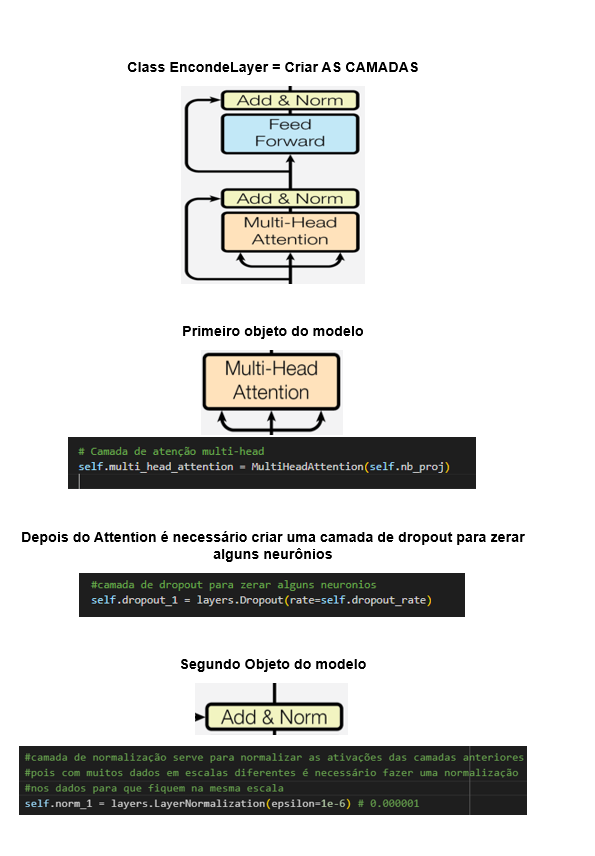

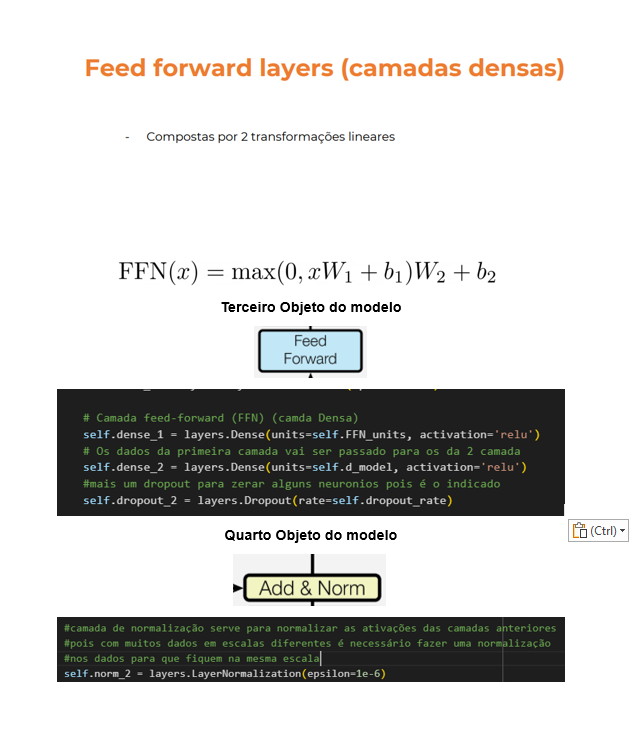

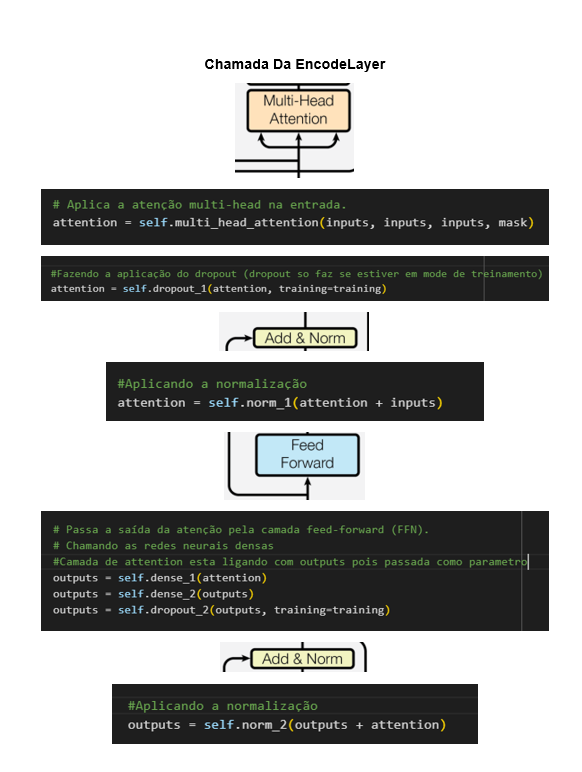

In [40]:
class EncoderLayer(layers.Layer):
    def __init__(self, FFN_units, nb_proj, dropout_rate):
        """
        Implementação de uma camada do encoder.

        Arguments:
            FFN_units: Número de unidades (neurônios) na camada feed-forward-network.
            nb_proj: Número de cabeças de atenção (número de projeções) na MultiHeadAttention.
            dropout_rate: Taxa de dropout para aplicar durante o treinamento.

        Returns:
            None
        """
        #chamando o construtor
        super(EncoderLayer, self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout_rate = dropout_rate

    def build(self, input_shape):
        """
        Constrói a camada do encoder.

        Arguments:
            input_shape: Shape (formato) da entrada da camada.

        Returns:
            None
        """
        #tamanho do modelo
        self.d_model = input_shape[-1]

        # Camada de atenção multi-head
        self.multi_head_attention = MultiHeadAttention(self.nb_proj)

        #camada de dropout para zerar alguns neuronios
        self.dropout_1 = layers.Dropout(rate=self.dropout_rate)

        #camada de normalização serve para normalizar as ativações das camadas anteriores
        #pois com muitos dados em escalas diferentes é necessário fazer uma normalização
        #nos dados para que fiquem na mesma escala
        self.norm_1 = layers.LayerNormalization(epsilon=1e-6) # 0.000001

        # Camada feed-forward (FFN) (camda Densa)
        self.dense_1 = layers.Dense(units=self.FFN_units, activation='relu')
        # Os dados da primeira camada vai ser passado para os da 2 camada
        self.dense_2 = layers.Dense(units=self.d_model, activation='relu')
        #mais um dropout para zerar alguns neuronios pois é o indicado
        self.dropout_2 = layers.Dropout(rate=self.dropout_rate)

        #camada de normalização serve para normalizar as ativações das camadas anteriores
        #pois com muitos dados em escalas diferentes é necessário fazer uma normalização
        #nos dados para que fiquem na mesma escala
        self.norm_2 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs, mask, training):
        """
        Chamada da camada do encoder.

        Arguments:
            inputs: Tensor de entrada para a camada do encoder.
            mask: Máscara de atenção para lidar com elementos de "padding" na sequência.
            training: Variável booleana que indica se o modelo está em modo de treinamento.

        Returns:
            Tensor de shape (batch_size, seq_length, d_model).
            Representa as saídas da camada do encoder.
        """
        # Aplica a atenção multi-head na entrada.
        attention = self.multi_head_attention(inputs, inputs, inputs, mask)

        #Fazendo a aplicação do dropout (dropout so faz se estiver em mode de treinamento)
        attention = self.dropout_1(attention, training=training)

        #Aplicando a normalização
        attention = self.norm_1(attention + inputs)

        # Passa a saída da atenção pela camada feed-forward (FFN).
        # Chamando as redes neurais densas
        #Camada de attention esta ligando com outputs pois passada como parametro
        outputs = self.dense_1(attention)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_2(outputs, training=training)

        #Aplicando a normalização
        outputs = self.norm_2(outputs + attention)

        # Retorna as saídas da camada do encoder.
        return outputs


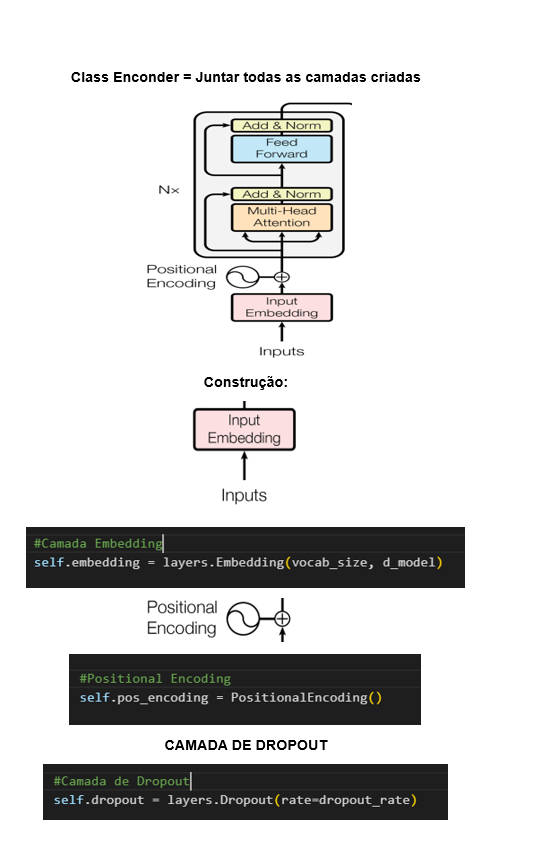

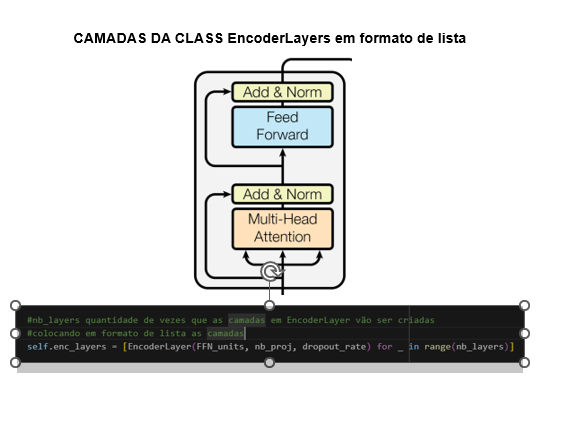

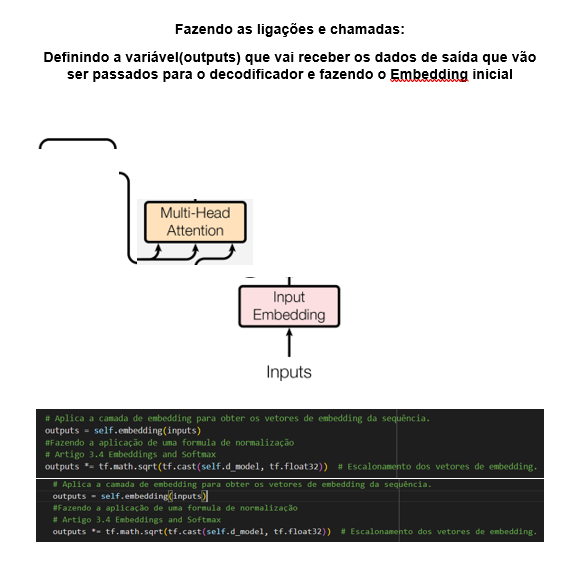

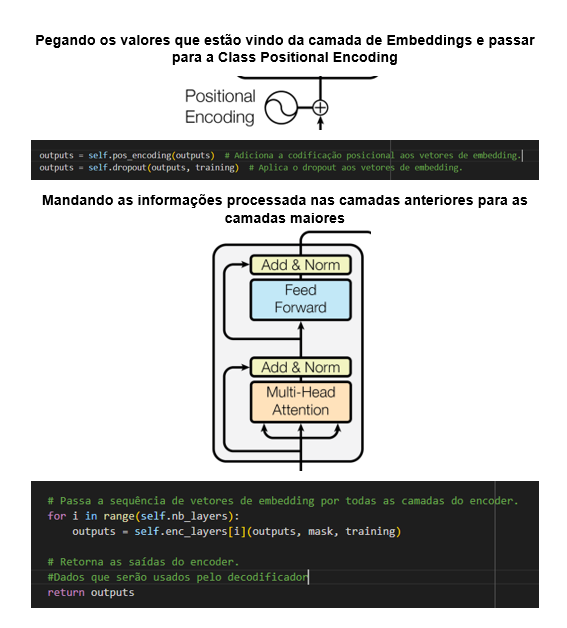

In [41]:
class Encoder(layers.Layer):
    def __init__(self,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout_rate,
                 vocab_size,
                 d_model,
                 name="encoder"):
        """
        Implementação do encoder do modelo de linguagem.

        Arguments:
            nb_layers: Número de vezes da repetição do encoder dentro da camada.
            FFN_units: Número de unidades (neurônios) na camada feed-forward.
            nb_proj: Número de cabeças de atenção (número de projeções) na MultiHeadAttention.
            dropout_rate: Taxa de dropout para aplicar durante o treinamento.
            vocab_size: Tamanho do vocabulário (número de tokens únicos).
            d_model: Dimensão do espaço de embedding.
            name: Nome da camada do encoder (opcional).

        Returns:
            None
        """
        super(Encoder, self).__init__(name=name)
        self.nb_layers = nb_layers
        self.d_model = d_model

        # Camadas do encoder

        #Camada Embedding
        self.embedding = layers.Embedding(vocab_size, d_model)

        #Positional Encoding
        self.pos_encoding = PositionalEncoding()

        #Camada de Dropout
        self.dropout = layers.Dropout(rate=dropout_rate)

        #nb_layers quantidade de vezes que as camadas em EncoderLayer vão ser criadas
        #colocando em formato de lista as camadas
        self.enc_layers = [EncoderLayer(FFN_units, nb_proj, dropout_rate) for _ in range(nb_layers)]

    def call(self, inputs, mask, training):
        """
        Chamada do encoder do modelo de linguagem.

        Arguments:
            inputs: Sequência de entrada codificada em números inteiros (tokens).
            mask: Máscara de atenção para lidar com elementos de "padding" na sequência.
            training: Variável booleana que indica se o modelo está em modo de treinamento.

        Returns:
            Tensor de shape (batch_size, seq_length, d_model).
            Representa as saídas do encoder.
        """
        # Aplica a camada de embedding para obter os vetores de embedding da sequência.
        outputs = self.embedding(inputs)
        #Fazendo a aplicação de uma formula de normalização
        # Artigo 3.4 Embeddings and Softmax
        outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))  # Escalonamento dos vetores de embedding.


        outputs = self.pos_encoding(outputs)  # Adiciona a codificação posicional aos vetores de embedding.
        outputs = self.dropout(outputs, training)  # Aplica o dropout aos vetores de embedding.


        # Passa a sequência de vetores de embedding por todas as camadas do encoder.
        for i in range(self.nb_layers):
            outputs = self.enc_layers[i](outputs, mask, training)

        # Retorna as saídas do encoder.
        #Dados que serão usados pelo decodificador
        return outputs


## Decoder

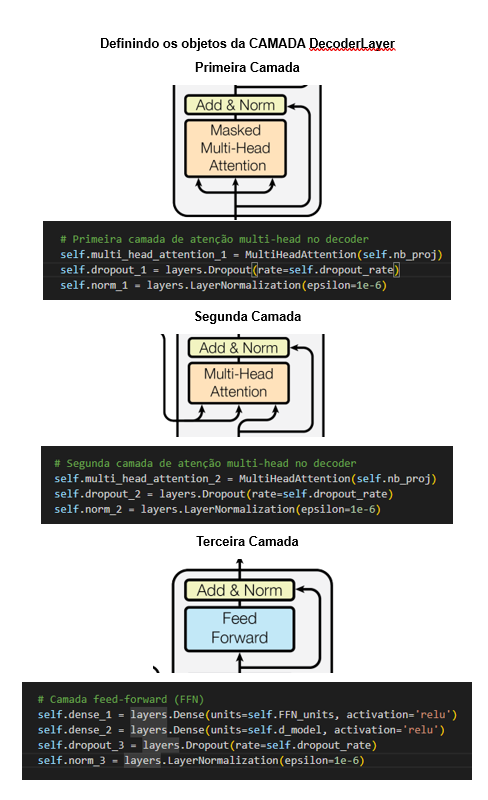

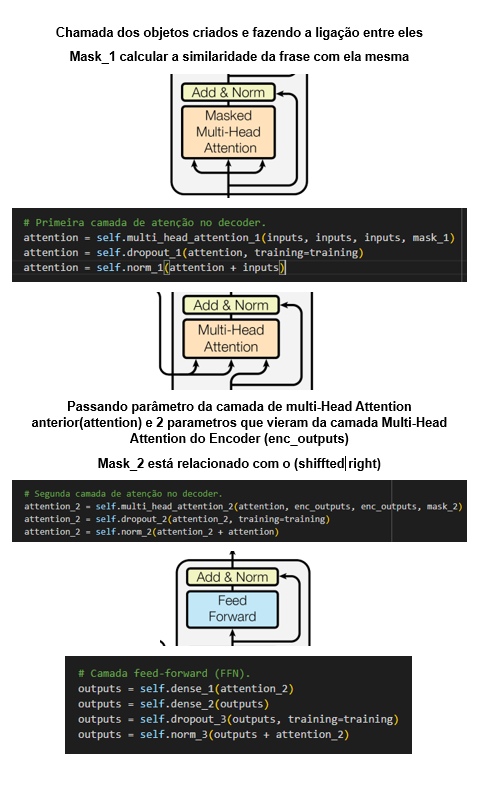

In [42]:
class DecoderLayer(layers.Layer):
    def __init__(self, FFN_units, nb_proj, dropout_rate):
        """
        Implementação de uma camada do decoder.

        Arguments:
            FFN_units: Número de unidades (neurônios) na camada feed-forward.
            nb_proj: Número de cabeças de atenção (número de projeções) na MultiHeadAttention.
            dropout_rate: Taxa de dropout para aplicar durante o treinamento.

        Returns:
            None
        """
        super(DecoderLayer, self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout_rate = dropout_rate

    #Criação dos objetos
    def build(self, input_shape):
        """
        Constrói a camada do decoder.

        Arguments:
            input_shape: Shape (formato) da entrada da camada.

        Returns:
            None
        """
        self.d_model = input_shape[-1]

        # Primeira camada de atenção multi-head no decoder
        self.multi_head_attention_1 = MultiHeadAttention(self.nb_proj)
        self.dropout_1 = layers.Dropout(rate=self.dropout_rate)
        self.norm_1 = layers.LayerNormalization(epsilon=1e-6)

        # Segunda camada de atenção multi-head no decoder
        self.multi_head_attention_2 = MultiHeadAttention(self.nb_proj)
        self.dropout_2 = layers.Dropout(rate=self.dropout_rate)
        self.norm_2 = layers.LayerNormalization(epsilon=1e-6)

        # Camada feed-forward (FFN)
        self.dense_1 = layers.Dense(units=self.FFN_units, activation='relu')
        self.dense_2 = layers.Dense(units=self.d_model, activation='relu')
        self.dropout_3 = layers.Dropout(rate=self.dropout_rate)
        self.norm_3 = layers.LayerNormalization(epsilon=1e-6)

    def call(self, inputs, enc_outputs, mask_1, mask_2, training):
        """
        Chamada da camada do decoder.

        Arguments:
            inputs: Tensor de entrada para a camada do decoder.
            enc_outputs: Saídas do encoder para a camada de atenção no decoder.
            mask_1: Máscara de atenção para lidar com elementos de "padding" na sequência (1ª atenção).
            mask_2: Máscara de atenção para lidar com elementos de "padding" na sequência (2ª atenção).
            training: Variável booleana que indica se o modelo está em modo de treinamento.

        Returns:
            Tensor de shape (batch_size, seq_length, d_model).
            Representa as saídas da camada do decoder.
        """
        # Primeira camada de atenção no decoder.
        attention = self.multi_head_attention_1(inputs, inputs, inputs, mask_1)
        attention = self.dropout_1(attention, training=training)
        attention = self.norm_1(attention + inputs)

        # Segunda camada de atenção no decoder.
        attention_2 = self.multi_head_attention_2(attention, enc_outputs, enc_outputs, mask_2)
        attention_2 = self.dropout_2(attention_2, training=training)
        attention_2 = self.norm_2(attention_2 + attention)

        # Camada feed-forward (FFN).
        outputs = self.dense_1(attention_2)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_3(outputs, training=training)
        outputs = self.norm_3(outputs + attention_2)

        # Retorna as saídas da camada do decoder.
        return outputs


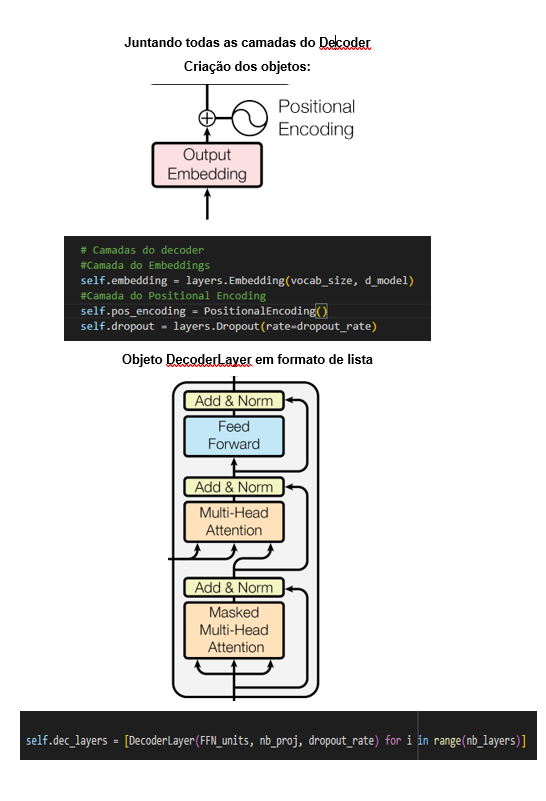

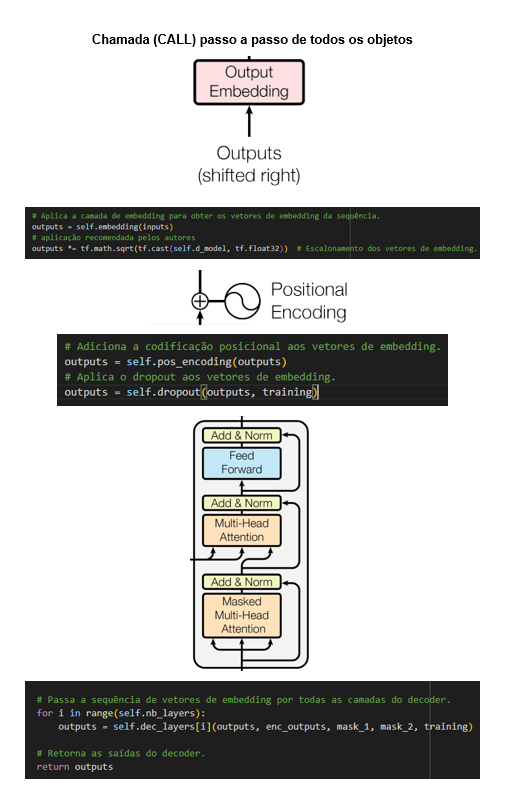

In [43]:
class Decoder(layers.Layer):
    def __init__(self,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout_rate,
                 vocab_size,
                 d_model,
                 name="decoder"):
        """
        Implementação do decoder do modelo de linguagem.

        Arguments:
            nb_layers: Número de camadas do decoder.
            FFN_units: Número de unidades (neurônios) na camada feed-forward.
            nb_proj: Número de cabeças de atenção (número de projeções) na MultiHeadAttention.
            dropout_rate: Taxa de dropout para aplicar durante o treinamento.
            vocab_size: Tamanho do vocabulário (número de tokens únicos).
            d_model: Dimensão do espaço de embedding.
            name: Nome da camada do decoder (opcional).

        Returns:
            None
        """
        super(Decoder, self).__init__(name=name)
        self.d_model = d_model
        self.nb_layers = nb_layers

        # Camadas do decoder
        #Camada do Embeddings
        self.embedding = layers.Embedding(vocab_size, d_model)
        #Camada do Positional Encoding
        self.pos_encoding = PositionalEncoding()
        self.dropout = layers.Dropout(rate=dropout_rate)

        #Objeto DecoderLayer
        self.dec_layers = [DecoderLayer(FFN_units, nb_proj, dropout_rate) for i in range(nb_layers)]

    def call(self, inputs, enc_outputs, mask_1, mask_2, training):
        """
        Chamada do decoder do modelo de linguagem.

        Arguments:
            inputs: Sequência de entrada codificada em números inteiros (tokens).
            enc_outputs: Saídas do encoder para a camada de atenção no decoder.
            mask_1: Máscara de atenção para lidar com elementos de "padding" na sequência (1ª atenção).
            mask_2: Máscara de atenção para lidar com elementos de "padding" na sequência (2ª atenção).
            training: Variável booleana que indica se o modelo está em modo de treinamento.

        Returns:
            Tensor de shape (batch_size, seq_length, d_model).
            Representa as saídas do decoder.
        """
        # Aplica a camada de embedding para obter os vetores de embedding da sequência.
        outputs = self.embedding(inputs)
        # aplicação recomendada pelos autores
        outputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))  # Escalonamento dos vetores de embedding.

        # Adiciona a codificação posicional aos vetores de embedding.
        outputs = self.pos_encoding(outputs)
        # Aplica o dropout aos vetores de embedding.
        outputs = self.dropout(outputs, training)

        # Passa a sequência de vetores de embedding por todas as camadas do decoder.
        for i in range(self.nb_layers):
            outputs = self.dec_layers[i](outputs, enc_outputs, mask_1, mask_2, training)

        # Retorna as saídas do decoder.
        return outputs


## Transformer

- Matriz triangular: https://mundoeducacao.bol.uol.com.br/matematica/matriz-triangular.htm

Neste código, implementamos a classe Transformer que é o modelo de linguagem Transformer completo. Ela contém as camadas do encoder e decoder, assim como a camada final para a saída do modelo. Além disso, a classe possui métodos para criar as máscaras de padding e look-ahead necessárias para o processo de atenção. Na chamada call, passamos a sequência de entrada pelo encoder e pelo decoder, combinamos as saídas do decoder e passamos pela camada final para obter as saídas finais do modelo.

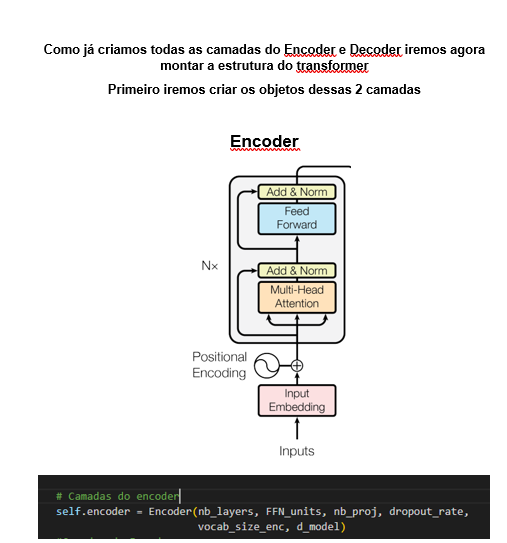

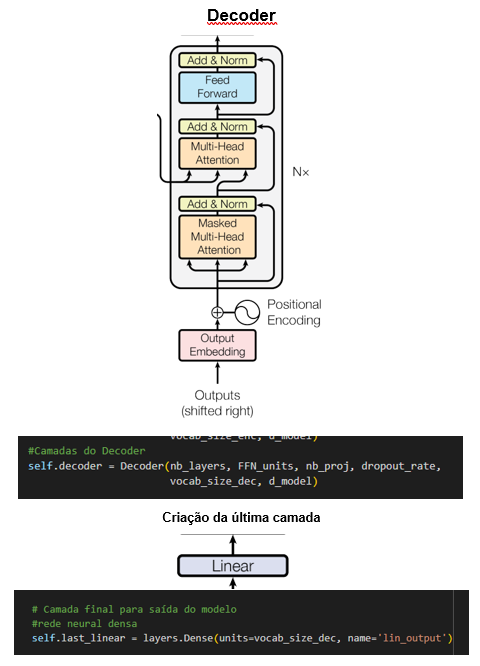

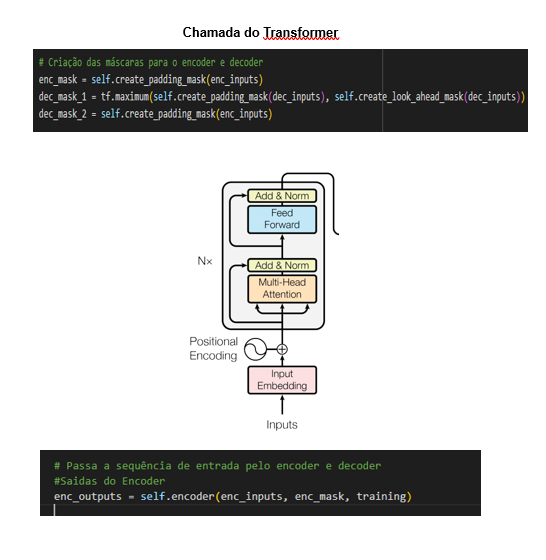

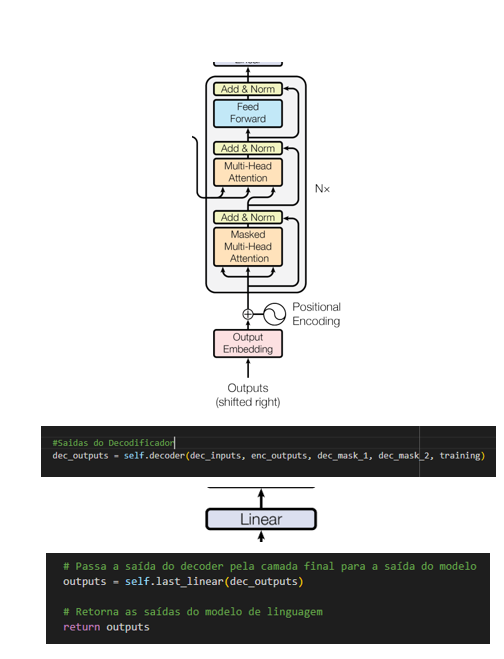

In [44]:
class Transformer(tf.keras.Model):
    def __init__(self,
                 vocab_size_enc,
                 vocab_size_dec,
                 d_model,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout_rate,
                 name="transformer"):
        """
        Implementação do modelo de linguagem Transformer.

        Arguments:
            vocab_size_en: Tamanho do vocabulário de entrada (encoder).(vocabulario ingles)
            vocab_size_dec: Tamanho do vocabulário de saída (decoder).(vocabulario portugues)
            d_model: Dimensão do espaço de embedding.
            nb_layers: Número de camadas no encoder e no decoder.
            FFN_units: Número de unidades (neurônios) na camada feed-forward.
            nb_proj: Número de cabeças de atenção (número de projeções) na MultiHeadAttention.
            dropout_rate: Taxa de dropout para aplicar durante o treinamento.
            name: Nome do modelo de linguagem (opcional).

        Returns:
            None
        """
        super(Transformer, self).__init__(name=name)

        # Camadas do encoder
        self.encoder = Encoder(nb_layers, FFN_units, nb_proj, dropout_rate,
                               vocab_size_enc, d_model)
        #Camadas do Decoder
        self.decoder = Decoder(nb_layers, FFN_units, nb_proj, dropout_rate,
                               vocab_size_dec, d_model)

        # Camada final para saída do modelo
        #rede neural densa
        self.last_linear = layers.Dense(units=vocab_size_dec, name='lin_output')

    def create_padding_mask(self, seq):
        """
        Cria a máscara de padding para a sequência de entrada.

        Arguments:
            seq: Sequência de entrada codificada em números inteiros (tokens).

        Returns:
            Máscara de padding com zeros para elementos de padding e uns caso contrário.
            Shape: (batch_size, nb_proj, seq_length, d_proj)
        """
        mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
        return mask[:, tf.newaxis, tf.newaxis, :]

    def create_look_ahead_mask(self, seq):
        """
        Cria a máscara de look-ahead para a sequência de entrada.

        Arguments:
            seq: Sequência de entrada codificada em números inteiros (tokens).

        Returns:
            Máscara de look-ahead para impedir que o decoder veja tokens futuros.
        """
        seq_len = tf.shape(seq)[1]
        look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
        return look_ahead_mask

    def call(self, enc_inputs, dec_inputs, training):
        """
        Chamada do modelo de linguagem Transformer.

        Arguments:
            enc_inputs: Sequência de entrada codificada em números inteiros para o encoder.
            dec_inputs: Sequência de entrada codificada em números inteiros para o decoder.
            training: Variável booleana que indica se o modelo está em modo de treinamento.

        Returns:
            Tensor de shape (batch_size, seq_length, vocab_size_dec).
            Representa as saídas do modelo de linguagem.
        """
        # Criação das máscaras para o encoder e decoder
        enc_mask = self.create_padding_mask(enc_inputs)
        dec_mask_1 = tf.maximum(self.create_padding_mask(dec_inputs), self.create_look_ahead_mask(dec_inputs))
        dec_mask_2 = self.create_padding_mask(enc_inputs)

        # Passa a sequência de entrada pelo encoder e decoder
        #Saidas do Encoder
        enc_outputs = self.encoder(enc_inputs, enc_mask, training)

        #Saidas do Decodificador
        dec_outputs = self.decoder(dec_inputs, enc_outputs, dec_mask_1, dec_mask_2, training)

        # Passa a saída do decoder pela camada final para a saída do modelo
        outputs = self.last_linear(dec_outputs)

        # Retorna as saídas do modelo de linguagem
        return outputs


## Código somente para testes

In [45]:
# Código somente para testes

def create_padding_mask(seq):
    """
    Cria a máscara de padding para a sequência.

    Arguments:
        seq: Sequência de entrada codificada em números inteiros (tokens).

    Returns:
        Máscara de padding com zeros para elementos de padding e uns caso contrário.
        Shape: (batch_size, nb_proj, seq_length, d_proj)
    """
    mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return mask[:, tf.newaxis, tf.newaxis, :]

def create_look_ahead_mask(seq):
    """
    Cria a máscara de look-ahead para a sequência.

    Arguments:
        seq: Sequência de entrada codificada em números inteiros (tokens).

    Returns:
        Máscara de look-ahead para impedir que o modelo veja tokens futuros.
    """
    seq_len = tf.shape(seq)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    return look_ahead_mask


In [46]:
seq = tf.cast([[837, 836, 0, 273, 8, 0, 0, 0]], tf.int32)
tf.maximum(create_padding_mask(seq), create_look_ahead_mask(seq))

<tf.Tensor: shape=(1, 1, 8, 8), dtype=float32, numpy=
array([[[[0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 0., 1., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.]]]], dtype=float32)>

In [47]:
create_padding_mask(seq)

<tf.Tensor: shape=(1, 1, 1, 8), dtype=float32, numpy=array([[[[0., 0., 1., 0., 0., 1., 1., 1.]]]], dtype=float32)>

In [48]:
create_look_ahead_mask(seq)

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

# Treinamento

In [49]:
# Limpa a sessão do Keras para garantir uma nova construção do modelo
# Não ficar nenhum residuo na memoria
tf.keras.backend.clear_session()

# Definição dos hiperparâmetros do modelo Transformer
d_model = 128  # Dimensão da matriz de embedding e das camadas de saída do modelo(512 recomendado no artigo)
nb_layers = 4  # Número de camadas no encoder e decoder(6 recomendado no artigo )
ffn_units = 512  # Número de unidades na camada de feed-forward dentro do encoder e decoder(2048 recomendado no artigo)
nb_proj = 8  # Número de projeções (número de cabeças de atenção)
dropout_rate = 0.1  # Taxa de dropout para regularização durante o treinamento


In [50]:
# Criando uma instância do modelo de linguagem Transformer
transformer = Transformer(vocab_size_enc=vocab_size_en, # Tamanho do vocabulário para o encoder (inglês)
                          vocab_size_dec=vocab_size_pt, # Tamanho do vocabulário para o decoder (português)
                          d_model=d_model, # Dimensão do embedding e das camadas de saída do modelo
                          nb_layers=nb_layers, # Número de camadas no encoder e decoder
                          FFN_units=ffn_units, # Número de unidades na camada de feed-forward dentro do encoder e decoder
                          nb_proj=nb_proj, # Número de projeções (número de cabeças de atenção)
                          dropout_rate=dropout_rate) # Taxa de dropout para regularização durante o treinamento


In [51]:
# Definição da função de perda Sparse Categorical Crossentropy com valores de erros.
# A função será usada para calcular a perda entre os rótulos reais (target) e as previsões do modelo.

# Criando uma instância da função de perda Sparse Categorical Crossentropy com os seguintes argumentos:
# from_logits=True: Indica que as previsões do modelo não têm uma função de ativação Softmax aplicada,
#                    portanto, espera-se que as previsões sejam logits (valores reais antes da Softmax).

# reduction='none': Não realiza redução na perda calculada. Isso significa que a perda não será reduzida
#                   em uma média ou soma, mas em vez disso, será retornada um tensor com a perda para cada
#                   amostra individual. Essa abordagem é comumente usada quando queremos calcular métricas
#                   personalizadas, como a média da perda ignorando elementos de padding (preenchimento).

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')



Uma função de perda, também conhecida como função de custo ou função objetivo, é um componente crucial em diversos algoritmos de aprendizado de máquina e técnicas de otimização. Ela quantifica a diferença entre a saída prevista de um modelo e os rótulos reais (ground truth) em um conjunto de dados. O objetivo principal de uma função de perda é orientar o processo de aprendizado, fornecendo uma medida de quão bem o modelo está se saindo na tarefa em questão.

In [52]:
#função que efetivamente vai fazer o calculo do erro
def loss_function(target, pred):
    """
    Calcula a função de perda Sparse Categorical Crossentropy customizada para lidar com elementos de padding.

    Argumentos:
        target: Rótulos reais (target).
        pred: Previsões do modelo.

    Retorna:
        Valor da função de perda calculada.
    """
    # Criando uma máscara booleana para ignorar os tokens de preenchimento (padding)
    mask = tf.math.logical_not(tf.math.equal(target, 0))

    # Calculando a perda com base na função de perda Sparse Categorical Crossentropy definida anteriormente
    loss_ = loss_object(target, pred)

    # Convertendo a máscara booleana em um tensor numérico (0 ou 1)
    mask = tf.cast(mask, dtype=loss_.dtype)

    # Aplicando a máscara para ignorar os tokens de preenchimento na perda
    loss_ *= mask

    # Reduzindo a média da perda ignorando os tokens de preenchimento
    return tf.reduce_mean(loss_)


In [53]:
# Criando uma métrica para acompanhar a média da perda durante o treinamento
train_loss = tf.keras.metrics.Mean(name='train_loss')

# Criando uma métrica para acompanhar a acurácia categórica esparsa durante o treinamento
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')


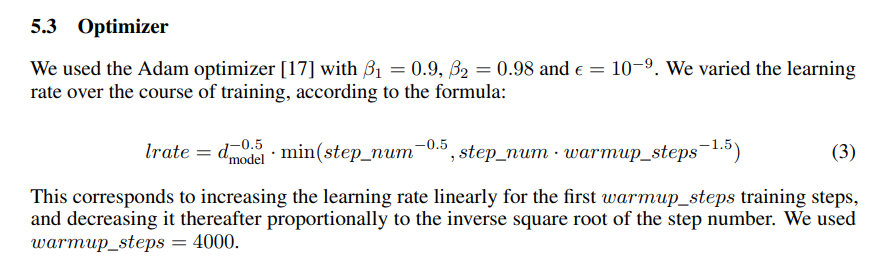

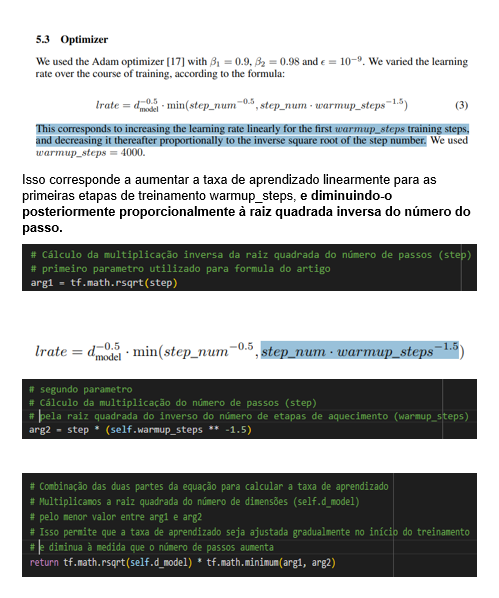

In [54]:
# calendário de execução personalizado
# decaindo da learning rate sera baseada nesses calculos
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    """
    Inicialização da taxa de aprendizado personalizada.

    Argumentos:
        d_model: Número de dimensões do modelo (tamanho do embedding).
        warmup_steps: Número de etapas de aquecimento (warmup steps) para ajustar a taxa de aprendizado.

    Retorna:
        None
    """
    super(CustomSchedule, self).__init__()

    # Convertendo o número de dimensões (d_model) para o tipo float32
    self.d_model = tf.cast(d_model, tf.float32)

    # Número de etapas de aquecimento (warmup steps) para ajustar a taxa de aprendizado
    self.warmup_steps = warmup_steps


  def __call__(self, step):
    """
    Função para calcular a taxa de aprendizado em função do número de etapas de treinamento (step).

    Argumentos:
        step: Número de etapas de treinamento (step).

    Retorna:
        Taxa de aprendizado calculada.
    """
    # Converta o tensor 'step' para float32 antes de calcular a raiz quadrada inversa
    step = tf.cast(step, tf.float32)

    # Cálculo da multiplicação inversa da raiz quadrada do número de passos (step)
    # primeiro parametro utilizado para formula do artigo
    arg1 = tf.math.rsqrt(step)

    # segundo parametro
    # Cálculo da multiplicação do número de passos (step)
    # pela raiz quadrada do inverso do número de etapas de aquecimento (warmup_steps)
    arg2 = step * (self.warmup_steps ** -1.5)

    # Combinação das duas partes da equação para calcular a taxa de aprendizado
    # Multiplicamos a raiz quadrada do número de dimensões (self.d_model)
    # pelo menor valor entre arg1 e arg2
    # Isso permite que a taxa de aprendizado seja ajustada gradualmente no início do treinamento
    # e diminua à medida que o número de passos aumenta
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


In [55]:
# Criação de uma instância da classe CustomSchedule para definir a taxa de aprendizagem
# A taxa de aprendizagem é ajustada dinamicamente durante o treinamento
learning_rate = CustomSchedule(d_model)

Definição dos hiperparâmetros adicionais:

beta_1: É o fator de decaimento para o momento de primeira ordem.

Controla a influência dos gradientes anteriores na atualização dos parâmetros do modelo. Um valor mais próximo de 1 significa que os gradientes anteriores têm uma influência mais forte nas atualizações,o que pode ajudar a suavizar o caminho de atualização ao longo do tempo.

beta_2: É o fator de decaimento para o momento de segunda ordem.

Controla a influência dos quadrados dos gradientes anteriores na atualização dos parâmetros do modelo. Um valor mais próximo de 1 significa que os quadDefinição dos hiperparâmetros adicionais:rados dos gradientes anteriores têm uma influência mais forte nas atualizações, o que pode ajudar a ajustar a taxa de aprendizagem para diferentes parâmetros.

epsilon: É um pequeno valor adicionado ao denominador para evitar a divisão por zero.

Observação: A taxa de aprendizagem é determinada pela função de agendamento de aprendizagem (learning_rate).

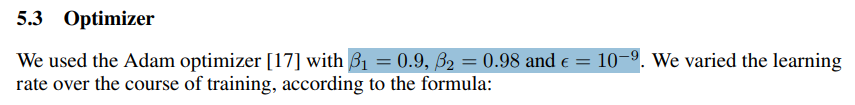

In [56]:
# Criação de um otimizador Adam com a taxa de aprendizagem definida pelo learning_rate.
# O otimizador Adam é amplamente utilizado em problemas de otimização, especialmente em modelos de Aprendizado Profundo.

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)


In [57]:
# Definindo o caminho para o diretório onde os pontos de verificação (checkpoints) serão salvos.
# Esses pontos de verificação são usados para salvar e restaurar o estado do modelo e do otimizador durante o treinamento.

checkpoint_path = "/content/drive/MyDrive/tradutor"

# Criando um objeto tf.train.Checkpoint para salvar e restaurar o estado do modelo (transformer) e do otimizador (optimizer).
# Isso permite que o treinamento seja interrompido e retomado posteriormente, se necessário.

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

# Criando um gerenciador de pontos de verificação (checkpoint) para controlar os pontos de verificação salvos.
# O max_to_keep=5 define o número máximo de pontos de verificação a serem mantidos no diretório de pontos de verificação.
# Se o número de pontos de verificação exceder esse valor, os mais antigos serão excluídos.

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# Verificando se há algum ponto de verificação (checkpoint) existente no diretório de pontos de verificação.
if ckpt_manager.latest_checkpoint:
    # Se houver um ponto de verificação, ele é restaurado para o modelo e otimizador.
    # Isso permite que o treinamento seja retomado a partir do ponto em que foi interrompido anteriormente.

    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Latest checkpoint restored')


Latest checkpoint restored


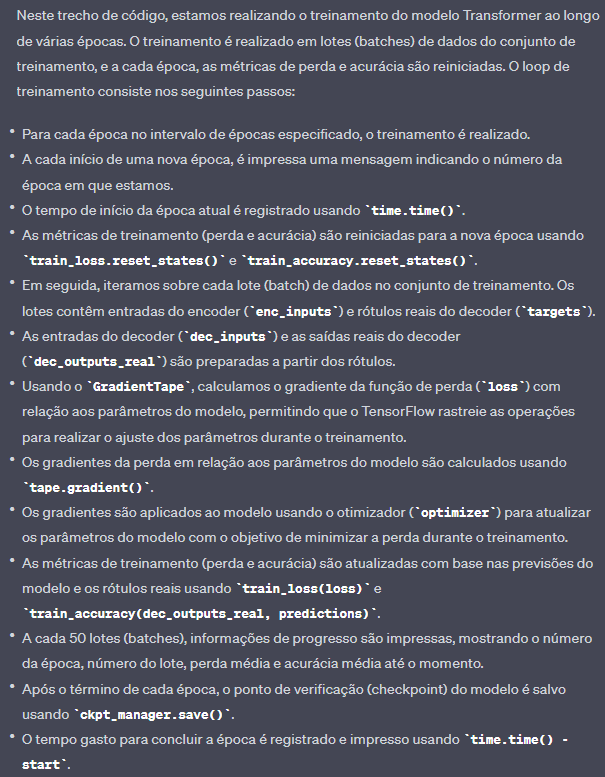

In [58]:
# Definindo o número de épocas (iterações) de treinamento.
epochs = 5

# Iniciando o loop de treinamento para cada época.
for epoch in range(epochs):
    print('Start of epoch {}'.format(epoch + 1))
    start = time.time()

    # Resetando os estados das métricas de treinamento para cada época.
    train_loss.reset_states()
    train_accuracy.reset_states()

    # Iterando sobre os lotes (batches) de dados no conjunto de dados de treinamento.
    # enc_inputs = entradas do codificador (encoder)
    # targets = respostas reais
    # dataset = (entrada e saidas ) ou os texto em ingles e os textos em portugues
    for (batch, (enc_inputs, targets)) in enumerate(dataset):
        # Preparando as entradas e saídas do decoder para o treinamento.
        dec_inputs = targets[:, :-1]
        dec_outputs_real = targets[:, 1:]

        # Usando GradientTape para calcular o gradiente da função de perda com relação aos parâmetros do modelo.
        with tf.GradientTape() as tape:
            # Fazendo previsões usando o modelo Transformer.
            # e retornando as probabilidades
            predictions = transformer(enc_inputs, dec_inputs, True)


            # Calculando a perda entre as saídas reais do decoder e as previsões do modelo.
            # comparando o texto real(dec_outputs_real) que ja esta na base de dados
            # com as previsões do transformer (predictions)
            loss = loss_function(dec_outputs_real, predictions)

        # Calculando os gradientes da perda em relação aos parâmetros do modelo.
        # indica a direção dos pesos (aumentar ou diminuir)
        gradients = tape.gradient(loss, transformer.trainable_variables)

        # Aplicando os gradientes ao modelo usando o otimizador para atualizar os parâmetros do modelo.
        # e fazendo o calculo da atualização dos pesos
        optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

        # Atualizando as métricas de treinamento (perda e acurácia).
        train_loss(loss)
        train_accuracy(dec_outputs_real, predictions)

        # Imprimindo informações de progresso a cada 50 lotes (batches).
        if batch % 50 == 0:
            print('Epoch {} Batch {} Loss {:.4f} Accuracy {:.4f}'.format(epoch+1, batch, train_loss.result(), train_accuracy.result()))

    # Salvando o ponto de verificação (checkpoint) do modelo para a época atual.
    ckpt_save_path = ckpt_manager.save()
    print('Saving checkpoint for epoch {} at {}'.format(epoch + 1, ckpt_save_path))

    # Imprimindo o tempo gasto para concluir a época atual.
    print('Time taken for 1 epoch {} secs\n'.format(time.time() - start))


Start of epoch 1


Epoch 1 Batch 0 Loss 1.1980 Accuracy 0.4944
Epoch 1 Batch 50 Loss 1.1999 Accuracy 0.4824
Epoch 1 Batch 100 Loss 1.1827 Accuracy 0.4835
Epoch 1 Batch 150 Loss 1.1556 Accuracy 0.4846
Epoch 1 Batch 200 Loss 1.1564 Accuracy 0.4852
Epoch 1 Batch 250 Loss 1.1492 Accuracy 0.4853
Epoch 1 Batch 300 Loss 1.1444 Accuracy 0.4862
Epoch 1 Batch 350 Loss 1.1402 Accuracy 0.4861
Epoch 1 Batch 400 Loss 1.1299 Accuracy 0.4865
Epoch 1 Batch 450 Loss 1.1235 Accuracy 0.4866
Epoch 1 Batch 500 Loss 1.1145 Accuracy 0.4876
Epoch 1 Batch 550 Loss 1.1096 Accuracy 0.4878
Epoch 1 Batch 600 Loss 1.1029 Accuracy 0.4885
Epoch 1 Batch 650 Loss 1.1000 Accuracy 0.4890
Epoch 1 Batch 700 Loss 1.0939 Accuracy 0.4888
Epoch 1 Batch 750 Loss 1.0891 Accuracy 0.4892
Epoch 1 Batch 800 Loss 1.0840 Accuracy 0.4896
Epoch 1 Batch 850 Loss 1.0804 Accuracy 0.4896
Epoch 1 Batch 900 Loss 1.0759 Accuracy 0.4899
Epoch 1 Batch 950 Loss 1.0725 Accuracy 0.4903
Epoch 1 Batch 1000 Loss 1.0671 Accuracy 0.4904
Epoch 1 Batch 1050 Loss 1.0618 Accur

In [59]:
print("Shape of targets:", targets.shape)
if len(targets.shape) < 2:
    print("Error: The targets tensor has only one dimension. Expected a 2D tensor.")
else:
    dec_inputs = targets[:, :-1]
    dec_outputs_real = targets[:, 1:]


Shape of targets: (30, 15)


# Avaliação

In [60]:
text = 'you are smart'
text = [vocab_size_en - 2] + tokenizer_en.encode(text) + [vocab_size_en - 1]
text

[8191, 55, 17, 2202, 4099, 8192]

In [61]:
text = tf.expand_dims(text, axis=0)
text.shape

TensorShape([1, 6])

In [62]:
output = tf.expand_dims([vocab_size_pt - 2], axis = 0)
output.shape

TensorShape([1, 1])

In [63]:
def evaluate(inp_sentence):
  inp_sentence = [vocab_size_en - 2] + tokenizer_en.encode(inp_sentence) + [vocab_size_en - 1]
  enc_input = tf.expand_dims(inp_sentence, axis=0)

  output = tf.expand_dims([vocab_size_pt - 2], axis = 0)

  # i am -> am happy

  for _ in range(max_length):
    # (1, seq_length, vocab_size)
    predictions = transformer(enc_input, output, False)
    prediction = predictions[:, -1:, :]

    predicted_id = tf.cast(tf.argmax(prediction, axis=-1), tf.int32)

    if predicted_id == vocab_size_pt - 1:
      return tf.squeeze(output, axis=0)

    output = tf.concat([output, predicted_id], axis=1)

  return tf.squeeze(output, axis = 0)

In [64]:
def translate(sentence):
  output = evaluate(sentence).numpy()

  predicted_sentence = tokenizer_pt.decode([i for i in output if i < vocab_size_pt - 2])

  print('Input: {}'.format(sentence))
  print('Predicted translation: {}'.format(predicted_sentence))


In [65]:
translate("this is a really powerful tool")

Input: this is a really powerful tool
Predicted translation: É um instrumento poderoso.


Melhorias

- Utilizar a base de dados completa
- Aumentar o tamanho da frase
- Mudar os parâmetros